## Angus+2019
* https://ui.adsabs.harvard.edu/abs/2019AJ....158..173A/abstract

In [1]:
# %load init_ipynb
import os
import os
import matplotlib.pyplot as pl

sys.path.insert(0, '../code')
assert os.environ["CONDA_DEFAULT_ENV"] == 'wakai'

plotpar = {'axes.labelsize': 16,
           'font.size': 16,
           'legend.fontsize': 16,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': False,
           'xtick.direction': 'in',
           'ytick.direction': 'in'
           }
pl.rcParams.update(plotpar)

In [4]:
from utils import get_nexsci_data

df_nexsci = get_nexsci_data(table_name="ps", clobber=False)

Loaded:  ../data/nexsci_ps.csv


/media/jerome/20BA47B9BA4789EC/github/research/project/wakai/notebooks/../code/utils.py:22: DtypeWarning: Columns (3,4,50,65,148,153,183,206,211,237,242) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nexsci = pd.read_csv(fp)


In [5]:
from utils import get_relative_err_index

idx = (df_nexsci.st_age<1) & (df_nexsci.default_flag==1) #& (df_nexsci.disc_facility=='Kepler') 
idx2 = get_relative_err_index(df_nexsci[idx], par='st_age', rel_err=0.2)

df_young = df_nexsci[idx][idx2]
young_hoststar_names = df_young.hostname.unique()
len(young_hoststar_names), young_hoststar_names

(21,
 array(['WASP-189', 'Qatar-4', 'Qatar-5', 'Qatar-3', 'HIP 94235',
        'DS Tuc A', 'HD 110082', 'HD 63433', 'K2-100', 'Kepler-1643',
        'Kepler-1928', 'Kepler-411', 'K2-102', 'TOI-2048', 'TOI-1860',
        'K2-25', 'TOI-1227', 'Kepler-970', 'K2-33', 'V1298 Tau',
        'HIP 67522'], dtype=object))

In [7]:
import numpy as np
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Curtis2019_Rup147")
tabs = cd.get_tables_from_vizier(row_limit=-1)
df = tabs[1].to_pandas()
df['logTeff'] = df.Teff.apply(lambda x: np.log10(x))
df['st_rotp'] = df['Prot'].copy()
df = df.rename({"__BP-RP_0": "BP-RP_0"})
df

{'J/ApJ/904/140/table1': 'Ruprecht 147 catalog',
 'J/ApJ/904/140/table5': 'Data for the Pleiades, Praesepe, NGC 6811, NGC 752, '
                         'NGC 6819, and Ruprecht 147 clusters'}


,Cluster,Age,Av,GaiaDR2,OName,RA_ICRS,DE_ICRS,BP-RP,__BP-RP_0,Gmag,GMag,Teff,Prot,R147,Simbad,_RA.icrs,_DE.icrs,logTeff,st_rotp
0,Pleiades,0.12,0.12,67618285777617664,EPIC 210990525,53.882158,22.823390,0.7103,0.660386,9.7295,3.95639,6291.700195,2.7953,0,Simbad,53.882158,22.823390,3.798768,2.7953
1,Pleiades,0.12,0.12,67832346947351424,EPIC 211051975,54.046203,23.806264,3.1460,3.096090,17.2698,11.49670,3122.600098,0.5490,0,Simbad,54.046203,23.806264,3.494516,0.5490
2,Pleiades,0.12,0.12,64597927335800064,EPIC 210977505,54.101510,22.623601,1.7721,1.722190,13.5183,7.74519,4036.810059,11.1805,0,Simbad,54.101510,22.623601,3.606038,11.1805
3,Pleiades,0.12,0.12,67724697887107200,EPIC 211010818,54.160077,23.145484,3.1703,3.120390,17.5594,11.78630,3110.939941,0.3040,0,Simbad,54.160077,23.145484,3.492892,0.3040
4,Pleiades,0.12,0.12,67756789882795008,EPIC 211025925,54.485193,23.382239,2.7972,2.747290,15.8874,10.11430,3304.179932,0.8969,0,Simbad,54.485193,23.382239,3.519064,0.8969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Ruprecht 147,2.70,0.30,4183867079159884672,EPIC 219489683,289.460250,-16.624023,1.8770,1.752500,15.3750,7.71700,4007.669922,19.1114,1,Simbad,289.460250,-16.624023,3.602892,19.1114
919,Ruprecht 147,2.70,0.30,4087824807196545664,EPIC 219439085,288.586900,-16.749012,2.0406,1.916100,15.5517,7.89370,3867.110107,19.7648,1,Simbad,288.586900,-16.749012,3.587387,19.7648
920,Ruprecht 147,2.70,0.30,4084617394338908672,EPIC 218986703,288.978840,-17.770926,2.1041,1.979600,15.8266,8.16860,3818.260010,22.5664,1,Simbad,288.978840,-17.770926,3.581865,22.5664
921,Ruprecht 147,2.70,0.30,4088060892960421248,EPIC 219619241,288.383960,-16.286807,2.2064,2.081900,16.2221,8.56410,3743.760010,21.6887,1,Simbad,288.383960,-16.286807,3.573308,21.6887


In [8]:
import numpy as np

cd = CatalogDownloader(catalog_name="Curtis2019_NGC6811")
tabs = cd.get_tables_from_vizier(row_limit=-1)

tabs = cd.get_tables_from_vizier(row_limit=-1)
df_ngc6811 = tabs[0].to_pandas()
df_ngc6811['logTeff'] = df_ngc6811.Teff.apply(lambda x: np.log10(x))
df_ngc6811['st_rotp'] = df_ngc6811['Per'].copy()
df_ngc6811.head()

{'J/ApJ/879/49/table1': 'Data for the NGC 6811 benchmark sample'}
{'J/ApJ/879/49/table1': 'Data for the NGC 6811 benchmark sample'}


,Seq,KIC,Gaia,Gmag,BP-RP,Teff,Mass,SpT,Per,e_Per,NQ,f_Seq,Simbad,_RA,_DE,logTeff,st_rotp
0,1,9716563,2128134824634071424,13.313,0.569,6507,1.287,F5,1.11,0.3380,15,Y,Simbad,294.41072,46.48686,3.813381,1.11
1,2,9716076,2128122008451548672,13.350,0.570,6506,1.287,F5,2.50,0.0040,15,Y,Simbad,294.22782,46.41767,3.813314,2.50
2,3,9718403,2080469827339292672,13.444,0.574,6504,1.286,F5,2.09,0.0067,15,Y,Simbad,295.07502,46.43191,3.813181,2.09
3,4,9715923,2128125135187725696,13.337,0.580,6501,1.284,F5,0.92,0.0006,15,Y,Simbad,294.16389,46.45051,3.812980,0.92
4,5,9716858,2128133789541221888,13.581,0.607,6477,1.271,F5,3.74,0.5527,15,Y,Simbad,294.51185,46.44465,3.811374,3.74


In [9]:
cd = CatalogDownloader(catalog_name="Curtis2019_PisEri")
tabs = cd.get_tables_from_vizier(row_limit=-1)
df_PisEri = tabs[0].to_pandas()
df_PisEri['logTeff'] = df_PisEri.Teff.apply(lambda x: np.log10(x))
df_PisEri['st_rotp'] = df_PisEri['Prot'].copy()
df_PisEri.head()

{'J/AJ/158/77/table2': 'Rotation periods for Meingast et al. (2019, '
                       'J/A+A/622/L13) members of the Psc-Eri stream',
 'J/AJ/158/77/table3': 'Candidate massive members of the Psc-Eri stream'}


,Seq,f_Seq,Source,RA_ICRS,DE_ICRS,GBP-GRP,Teff,Gmag,GMag,Prot,Note,Simbad,logTeff,st_rotp
0,1,,3198972700981234048,04 22 31.5,-07 33 03.2,0.432,7187,8.903,2.802,0.52,Warm,Simbad,3.856548,0.52
1,2,,5181474045115843072,03 10 47.3,-06 34 29.8,0.446,7161,8.562,2.954,0.87,Warm,Simbad,3.854974,0.87
2,3,,2516948215250061568,02 20 22.6,+05 52 59.1,0.597,6622,9.183,3.534,0.82,Warm,Simbad,3.820989,0.82
3,4,,3245408684793798528,04 02 15.4,-05 53 48.2,0.604,6573,9.425,3.513,0.56,Conv.,Simbad,3.817764,0.56
4,5,,6628071944405827712,22 36 31.1,-21 35 06.0,0.647,6320,8.967,3.835,0.94,Conv.,Simbad,3.800717,0.94


In [10]:
# cd = CatalogDownloader(catalog_name="Rebull2016_Pleiades")
# tabs = cd.get_tables_from_vizier(row_limit=-1)
# df_rebull2016 = tabs[0].to_pandas()
# df_rebull2016 = df_rebull2016.rename({'__V-K_0': 'V-K_0'}, axis=1)
# df_rebull2016.columns

# cd = CatalogDownloader(catalog_name="Douglas2017_Praesepe")
# tabs = cd.get_tables_from_vizier(row_limit=-1)
# df_Douglas2017_Praesepe = tabs[2].to_pandas()
# df_Douglas2017_Praesepe.columns

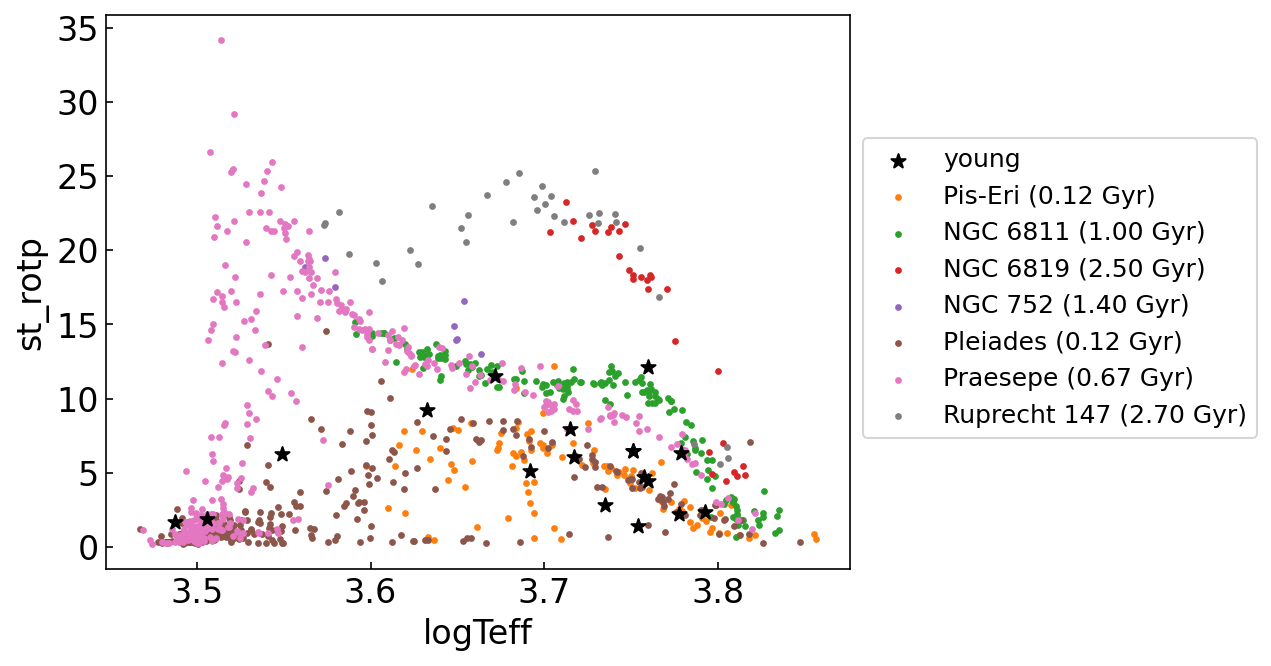

In [11]:
import numpy as np
from utils import plot_planets

df_young['logTeff'] = df_young.st_teff.apply(lambda x: np.log10(x))

ax = plot_planets(df_young, plot_kwds={'label':'young', 
                                        'color': 'k',
                                        'zorder': 10, 
                                        'marker': '*',
                                        'size': 50
                                        })
_ = plot_planets(df_PisEri, ax=ax, plot_kwds={'marker': '.',
                                            'c':'C1', 
                                            'label': 'Pis-Eri (0.12 Gyr)'}
                                            )
# _ = plot_planets(df_ngc6811, ax=ax, plot_kwds={'marker': '.', 
#                                             'c':'C2', 
#                                             'label': 'NGC 6811 (1000 Myr)'}
#                                             )

group_dict = df.groupby('Cluster').groups
for n,name in enumerate(group_dict.keys()):
    key = group_dict[name]
    d = df.loc[key]
    age = d.Age.iloc[0]
    _ = plot_planets(d, ax=ax, plot_kwds={'marker': '.', 
                                        'c':f'C{n+2}', 
                                        'label': f'{name} ({age:.2f} Gyr)'}
                                        )
    ax.legend(fontsize=12, bbox_to_anchor=(1, 0.8))